<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-and-Metric" data-toc-modified-id="Exploratory-Data-Analysis-and-Metric-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory Data Analysis and Metric</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Submit" data-toc-modified-id="Submit-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Submit</a></span></li><li><span><a href="#Homework" data-toc-modified-id="Homework-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Часть-1.-(4-балла)" data-toc-modified-id="Часть-1.-(4-балла)-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Часть 1. (4 балла)</a></span></li><li><span><a href="#Часть-2.-(3-баллов)" data-toc-modified-id="Часть-2.-(3-баллов)-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Часть 2. (3 баллов)</a></span></li></ul></li></ul></li></ul></div>

In [402]:
import pandas as pd
import numpy as np
import string
import gensim
import matplotlib.pyplot as plt
import re  
import nltk
plt.style.use('ggplot')


from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score
import pyLDAvis
import pyLDAvis.gensim
from tqdm import tqdm_notebook

TOKEN_PATTERN_rus = "[а-яё]+"
TOKEN_PATTERN_en = "[a-z]+"

In [88]:
SEED = 42

**[Kaggle InClass: Language Detection](https://www.kaggle.com/t/6b23f7b92b4b497e9aead739dd00ae1a)**

# Exploratory Data Analysis and Metric

In [213]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.shape, test_df.shape

((3159633, 2), (2784634, 2))

In [214]:
train_df

,sentence,language
0,"Pensez à la communication , le discours , les ...",fr
1,"Můžete si ji pronajmout , vzít na splátky , ko...",cs
2,"Každý starosta pochopil , že když mají tyto fo...",cs
3,"Det är ytterligare bevis , men ändå — Jag krit...",sv
4,كان الأمر لا يصدق .,ar
...,...,...
3159628,そんな所で捕まっている片手は 70億の人々と繫がる命綱なのです,ja
3159629,Първоначално се опитах да направя думите &quot...,bg
3159630,Ho appreso che ha a che fare con l&apos; atten...,it
3159631,E os edifícios não se limitam a apenas evocar ...,pt-br


In [215]:
train_df_rus = train_df[train_df.language == 'ru']
train_df_rus["sentence"].value_counts()[:20]

гэта што калі мы не яны як але ён каб дзякуй больш пра на вы       50000
що це тому ми чи дуже які щоб дякую якщо було вона від мене ось    25000
( Аплодисменты )                                                     603
Спасибо .                                                            349
Большое спасибо .                                                    109
Спасибо большое .                                                     43
Почему ?                                                              26
Спасибо . ( Аплодисменты )                                            24
( Аплодисменты ) Спасибо . ( Аплодисменты )                           21
Спасибо за внимание .                                                 21
( Апплодисменты )                                                     21
( аплодисменты )                                                      18
Благодарю вас .                                                       17
Хорошо .                                           

In [216]:
test = train_df[train_df.sentence == 'що це тому ми чи дуже які щоб дякую якщо було вона від мене ось']

In [217]:
test['language'].value_counts()

en    25000
ru    25000
th    25000
Name: language, dtype: int64

In [218]:
test = train_df[train_df.sentence == 'гэта што калі мы не яны як але ён каб дзякуй больш пра на вы']

In [219]:
test['language'].value_counts()

ru    50000
Name: language, dtype: int64

In [220]:
train_df = train_df.loc[~train_df['sentence'].isin(['гэта што калі мы не яны як але ён каб дзякуй больш пра на вы', 'що це тому ми чи дуже які щоб дякую якщо було вона від мене ось'])]

In [221]:
train_df_fr = train_df[train_df.language == 'fr']

In [222]:
train_df_fr["sentence"].value_counts()[:20]

это что мы не как на вы они но из то он так для аплодисменты    50000
( Applaudissements )                                              544
Merci .                                                           346
Merci beaucoup .                                                  180
Pourquoi ?                                                         31
Merci . ( Applaudissements )                                       19
( Applaudissements ) Merci .                                       17
-                                                                  16
( Applaudissements ) Merci . ( Applaudissements )                  14
( applaudissements )                                               14
Merci                                                              13
Bonjour .                                                          10
Je vous remercie .                                                 10
Oui .                                                              10
Non .               

In [223]:
test = train_df[train_df.sentence == 'это что мы не как на вы они но из то он так для аплодисменты']

In [224]:
test['language'].value_counts()

fr    50000
Name: language, dtype: int64

In [225]:
train_df = train_df.loc[~train_df['sentence'].isin(['это что мы не как на вы они но из то он так для аплодисменты'])]

In [226]:
train_df_it = train_df[train_df.language == 'it']
train_df_it["sentence"].value_counts()[:20]

( Applausi )                          558
Grazie .                              388
Grazie mille .                         89
Grazie infinite .                      45
( Applauso )                           30
Grazie                                 27
( Applausi ) Grazie . ( Applausi )     25
Perché ?                               25
( applausi )                           22
( Applausi ) Grazie .                  19
Molte grazie .                         17
Grazie . ( Applausi )                  17
Grazie molte .                         13
Bene .                                 11
Cosa significa ?                        9
Giusto ?                                8
Sì .                                    7
Grazie . ( Applausi ) ( Applausi )      7
( Risate )                              7
Grazie tante .                          7
Name: sentence, dtype: int64

In [227]:
train_df.shape, test_df.shape #((3109633, 2), (2784634, 2))

((2984633, 2), (2784634, 2))

In [152]:
# почищена тренировочная выборка от ошибок в разместке

In [176]:
corpus = train_df.sentence.values
punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~，،—。'

In [177]:
from nltk.tokenize import word_tokenize
corpus = train_df.sentence.values
tt = str.maketrans(dict.fromkeys(punctuation))

docs = [sen.translate(tt) for sen in corpus]

In [178]:
docs = [word_tokenize(sen) for sen in docs]

In [179]:
occurence = Counter()

for doc in docs:
    for token in doc:
        occurence[token] += 1

In [235]:
occurence.most_common(20)

[('quot', 606377),
 ('de', 377427),
 ('a', 326140),
 ('่', 226606),
 ('to', 179339),
 ('que', 173949),
 ('in', 166669),
 ('the', 156456),
 ('้', 154192),
 ('на', 151060),
 ('la', 141580),
 ('и', 129275),
 ('je', 127144),
 ('apos', 123019),
 ('en', 122436),
 ('в', 121126),
 ('is', 120575),
 ('не', 119203),
 ('of', 118670),
 ('e', 116989)]

In [181]:
# самые популярные токены всей тренировочной выборки

In [244]:
train_df_rus = train_df[train_df.language == 'ru']
test = train_df_rus[:1000]
punctuation = '!"()*,.:;<=>?[\\]^_`{|}~，،—。'
from nltk.tokenize import word_tokenize
corpus_rus = train_df_rus.sentence.values
tt = str.maketrans(dict.fromkeys(punctuation))

docs = [sen.translate(tt) for sen in corpus_rus]
docs = [sen.split() for sen in docs]
occurence_rus = Counter()

for doc in docs:
    for token in doc:
        occurence_rus[token] += 1
occurence_rus.most_common(20)

[('в', 41300),
 ('и', 40700),
 ('что', 28122),
 ('не', 20359),
 ('на', 20013),
 ('это', 17340),
 ('я', 16468),
 ('мы', 14990),
 ('с', 13661),
 ('как', 11424),
 ('И', 10078),
 ('&quot', 9627),
 ('Я', 8847),
 ('из', 7783),
 ('вы', 7400),
 ('Это', 7370),
 ('для', 7066),
 ('«', 7046),
 ('»', 7011),
 ('о', 6484)]

In [245]:
train_df_fr = train_df[train_df.language == 'fr']
test = train_df_fr[:1000]
punctuation = '!"()*,.:;<=>?[\\]^_`{|}~，،—。'
from nltk.tokenize import word_tokenize
corpus_fr = train_df_fr.sentence.values
tt = str.maketrans(dict.fromkeys(punctuation))

docs = [sen.translate(tt) for sen in corpus_fr]
docs = [sen.split() for sen in docs]
occurence_fr = Counter()

for doc in docs:
    for token in doc:
        occurence_fr[token] += 1
occurence_fr.most_common(20)

[('de', 72582),
 ('la', 37714),
 ('et', 36007),
 ('que', 32429),
 ('est', 32172),
 ('à', 30513),
 ('le', 30419),
 ('les', 30012),
 ('un', 27077),
 ('l&apos', 25901),
 ('des', 24487),
 ('en', 21950),
 ('une', 21803),
 ('d&apos', 21334),
 ('nous', 19014),
 ('a', 17696),
 ('qui', 17590),
 ('vous', 17411),
 ('dans', 16178),
 ('pour', 15573)]

In [248]:
train_df_fr

,sentence,language
0,"Pensez à la communication , le discours , les ...",fr
45,Le point GPS va fondamentalement changer vos v...,fr
63,Merci .,fr
88,On pourrait penser que les antibiotiques ont p...,fr
107,"Et il était tellement enthousiasmé , qu&apos; ...",fr
...,...,...
3159461,Nous désirons également apprendre de nouvelles...,fr
3159490,Le monde est empli d&apos; expressions musical...,fr
3159528,SW : Avec la tête maintenant .,fr
3159586,Je ne le savais pas au début .,fr


In [247]:
train_df_en = train_df[train_df.language == 'en']
test = train_df_en[:1000]
punctuation = '!"()*,.:;<=>?[\\]^_`{|}~，،—。'
from nltk.tokenize import word_tokenize
corpus_en = train_df_en.sentence.values
tt = str.maketrans(dict.fromkeys(punctuation))

docs = [sen.translate(tt) for sen in corpus_en]
docs = [sen.split() for sen in docs]
occurence_en = Counter()

for doc in docs:
    for token in doc:
        occurence_en[token] += 1
occurence_en.most_common(20)

[('the', 105465),
 ('to', 67445),
 ('of', 62125),
 ('and', 57393),
 ('a', 55656),
 ('that', 48316),
 ('I', 44445),
 ('in', 39356),
 ('&quot', 34273),
 ('is', 33771),
 ('you', 32995),
 ('it', 31545),
 ('we', 30044),
 ('&aposs', 29709),
 ('And', 22772),
 ('this', 21977),
 ('was', 16341),
 ('for', 15303),
 ('are', 14939),
 ('have', 14612)]

In [249]:
train_df_en

,sentence,language
24,"Our Fred Astaires , our Gene Kellys our Michae...",en
103,"Tell your daughters of this year , how we woke...",en
144,"Nowadays , high school students can build robo...",en
170,"A somatic cell , a body cell , was taken from ...",en
196,"You know what , let them use their mobile phon...",en
...,...,...
3159540,So this is a story of Napoleon III in the mid-...,en
3159556,The first thing I want to do is start with a g...,en
3159567,We &apos;re ethically precluded from even usin...,en
3159606,"Well , I became a tapestry historian .",en


In [253]:
train_df_it = train_df[train_df.language == 'it']
test = train_df_it[:1000]
punctuation = '!"()*,.:;<=>?[\\]^_`{|}~，،—。'
from nltk.tokenize import word_tokenize
corpus_it = train_df_it.sentence.values
tt = str.maketrans(dict.fromkeys(punctuation))

docs = [sen.translate(tt) for sen in corpus_it]
docs = [sen.split() for sen in docs]
occurence_it = Counter()

for doc in docs:
    for token in doc:
        occurence_it[token] += 1
occurence_it.most_common(20)

[('di', 58218),
 ('che', 47620),
 ('e', 38496),
 ('è', 30171),
 ('la', 28118),
 ('&quot', 27758),
 ('un', 26805),
 ('il', 26180),
 ('in', 24793),
 ('a', 22789),
 ('per', 20857),
 ('una', 17655),
 ('non', 16751),
 ('E', 13925),
 ('le', 13177),
 ('i', 12467),
 ('sono', 12194),
 ('l&apos', 12114),
 ('si', 10609),
 ('del', 10056)]

In [ ]:
#замеченно, что токены: &quot и &apos встречаются во многих языках, а значит они только портят модель и х стоит удалить

In [336]:
train_df.sentence[3]

'Det är ytterligare bevis , men ändå — Jag kritiserades av en forskare som sa , &quot; &quot; Du kan aldrig publicera en undersökning med ett n på 4 &quot; &quot; , syftandes på de fyra krockarna .'

In [338]:
sent = []
lang = []
for i in range(3159632):
    try:
        if not ('&quot' in train_df.sentence[i] or '&apos' in train_df.sentence[i]):
            sent.append(train_df.sentence[i])
            lang.append(train_df.language[i])
    except KeyError:
        pass

In [342]:
train_df.drop('sentence', axis = 1, inplace = True)
train_df.drop('language', axis = 1, inplace = True)
train_df = train_df[:len(sent)]
train_df['sentence'] = sent
train_df['language'] = lang

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [343]:
train_df

,sentence,language
2,"Každý starosta pochopil , že když mají tyto fo...",cs
3,كان الأمر لا يصدق .,ar
4,"Na primjer , pjesnik ga opisuje ovako .",hr
5,Semua rerumputan itu sekarang menutupi tanah s...,id
6,Det är en enorm utmaning för oss att göra det .,sv
...,...,...
2832001,我们不仅仅是女性 ，,zh-cn
2832002,"הייתם יכולים ללכת לכל פרוייקט דיור , לדוגמה , ...",he
2832003,( Pljesak ) S vremenom je stiglo još fotografi...,hr
2832004,そんな所で捕まっている片手は 70億の人々と繫がる命綱なのです,ja


In [ ]:
#найдены и удалены предложениями с токенами, которые встечаются во многих языках

In [344]:
train_df_rus = train_df[train_df.language == 'ru']
train_df_en = train_df[train_df.language == 'en']

In [362]:
def tokenize_rus(text):
    return re.findall(TOKEN_PATTERN_rus, text.lower())
def tokenize_en(text):
    return re.findall(TOKEN_PATTERN_en, text.lower())


corpus_rus = train_df_rus.sentence.values
tt = str.maketrans(dict.fromkeys(punctuation))
docs_rus = [tokenize_rus(sen) for sen in corpus_rus]
corpus_en = train_df_en.sentence.values
tt = str.maketrans(dict.fromkeys(punctuation))
docs_en = [tokenize_en(sen) for sen in corpus_en]

In [363]:
cooccurence_rus = Counter()

for doc in docs_rus:
    for i in range(len(doc) - 1):
        cooccurence_rus[(doc[i], doc[i + 1])] += 1
        
cooccurence_en = Counter()

for doc in docs_en:
    for i in range(len(doc) - 1):
        cooccurence_en[(doc[i], doc[i + 1])] += 1

In [364]:
cooccurence_en.most_common(20)

[(('of', 'the'), 6600),
 (('in', 'the'), 6075),
 (('this', 'is'), 3876),
 (('and', 'the'), 2949),
 (('and', 'i'), 2612),
 (('to', 'the'), 2569),
 (('is', 'a'), 2406),
 (('on', 'the'), 2288),
 (('to', 'be'), 2258),
 (('it', 'was'), 2018),
 (('i', 'was'), 2003),
 (('is', 'the'), 1951),
 (('you', 'can'), 1919),
 (('we', 'have'), 1820),
 (('in', 'a'), 1748),
 (('the', 'world'), 1681),
 (('at', 'the'), 1676),
 (('that', 'we'), 1676),
 (('and', 'we'), 1636),
 (('we', 'can'), 1623)]

In [365]:
cooccurence_rus.most_common(20)

[(('потому', 'что'), 3053),
 (('то', 'что'), 2262),
 (('что', 'мы'), 1881),
 (('и', 'я'), 1862),
 (('том', 'что'), 1596),
 (('у', 'нас'), 1535),
 (('что', 'я'), 1516),
 (('что', 'это'), 1491),
 (('в', 'том'), 1424),
 (('и', 'это'), 1420),
 (('я', 'не'), 1349),
 (('что', 'то'), 1345),
 (('так', 'что'), 1250),
 (('о', 'том'), 1223),
 (('мы', 'можем'), 1220),
 (('и', 'в'), 1187),
 (('это', 'не'), 1179),
 (('самом', 'деле'), 1147),
 (('в', 'этом'), 1130),
 (('на', 'самом'), 1127)]

In [367]:
occurence_rus = Counter()

for doc in docs_rus:
    for token in doc:
        occurence_rus[token] += 1
occurence_rus.most_common(20)

[('и', 48806),
 ('в', 44166),
 ('что', 30122),
 ('я', 24023),
 ('это', 23859),
 ('на', 20658),
 ('не', 20476),
 ('мы', 19654),
 ('с', 13934),
 ('как', 12736),
 ('но', 10020),
 ('то', 9487),
 ('вы', 8975),
 ('они', 8586),
 ('из', 8258),
 ('для', 7496),
 ('а', 7173),
 ('так', 6980),
 ('к', 6633),
 ('о', 6554)]

In [368]:
occurence_en = Counter()

for doc in docs_en:
    for token in doc:
        occurence_en[token] += 1
occurence_en.most_common(20)

[('the', 63375),
 ('and', 42378),
 ('of', 35132),
 ('to', 34976),
 ('a', 30042),
 ('in', 23422),
 ('that', 23381),
 ('is', 20652),
 ('we', 18878),
 ('i', 18756),
 ('you', 16625),
 ('it', 15725),
 ('this', 15222),
 ('was', 11218),
 ('so', 10409),
 ('are', 9516),
 ('for', 8959),
 ('they', 8574),
 ('have', 8091),
 ('on', 7438)]

In [373]:
N = sum(occurence_rus.values())
pmi_rus = Counter()
min_cooccur = 20

for pair in cooccurence_rus:
    if cooccurence_rus[pair] >= min_cooccur:
        pmi_rus[pair] = np.log(cooccurence_rus[pair] * N / occurence_rus[pair[0]] / occurence_rus[pair[1]])

In [375]:
pmi_rus.most_common()

[(('фуа', 'гра'), 11.203248604192078),
 (('сьерра', 'леоне'), 11.020927047398123),
 (('парниковых', 'газов'), 10.740713269553869),
 (('добро', 'пожаловать'), 10.733244974946343),
 (('ненулевой', 'суммой'), 10.470422939813957),
 (('уолл', 'стрит'), 10.44618809788848),
 (('сельское', 'хозяйство'), 10.300380892650065),
 (('программное', 'обеспечение'), 10.228688964193948),
 (('ближнем', 'востоке'), 10.194787412518266),
 (('долгосрочной', 'перспективе'), 10.086617810021291),
 (('углекислый', 'газ'), 10.071846492700978),
 (('сельского', 'хозяйства'), 10.040097794386398),
 (('глобального', 'потепления'), 9.761691564397138),
 (('питательные', 'вещества'), 9.69811356585767),
 (('мобильные', 'телефоны'), 9.665269655740124),
 (('лос', 'анджелеса'), 9.624269899242687),
 (('лос', 'анджелесе'), 9.624269899242687),
 (('палец', 'палец'), 9.459862719248239),
 (('прошлой', 'неделе'), 9.459555876656081),
 (('сан', 'франциско'), 9.41985738463454),
 (('углекислого', 'газа'), 9.378699312141032),
 (('соедин

In [376]:
N = sum(occurence_en.values())
pmi_en = Counter()
min_cooccur = 20

for pair in cooccurence_en:
    if cooccurence_en[pair] >= min_cooccur:
        pmi_en[pair] = np.log(cooccurence_en[pair] * N / occurence_en[pair[0]] / occurence_en[pair[1]])
pmi_en.most_common()

[(('hong', 'kong'), 10.72752921462439),
 (('sierra', 'leone'), 10.701211906307018),
 (('los', 'angeles'), 10.319844349777913),
 (('ooh', 'ooh'), 10.159441478691605),
 (('spinal', 'cord'), 10.127472457130457),
 (('sub', 'saharan'), 9.95114443549439),
 (('da', 'da'), 9.802766534752871),
 (('san', 'francisco'), 9.713265185526426),
 (('prime', 'minister'), 9.45646679813638),
 (('fossil', 'fuels'), 9.450806502754304),
 (('silicon', 'valley'), 9.380699074564294),
 (('coral', 'reefs'), 9.32663185329402),
 (('chris', 'anderson'), 9.240605512222574),
 (('x', 'ray'), 8.925004850086447),
 (('mental', 'illness'), 8.90747027587497),
 (('don', 't'), 8.866892822660166),
 (('carbon', 'dioxide'), 8.85131189042105),
 (('european', 'union'), 8.559047106153825),
 (('blood', 'vessels'), 8.396927577560012),
 (('national', 'geographic'), 8.254284504584232),
 (('per', 'capita'), 8.23735866571685),
 (('vast', 'majority'), 8.146651227983188),
 (('artificial', 'intelligence'), 8.088089305140919),
 (('latin', 'am

In [377]:
# выделены коллакации для русского и английского языков

In [388]:
corpus = train_df.sentence.values
corpus

array(['Každý starosta pochopil , že když mají tyto formy , mají i kulturu a turismus .',
       'كان الأمر لا يصدق .', 'Na primjer , pjesnik ga opisuje ovako .',
       ...,
       '( Pljesak ) S vremenom je stiglo još fotografija i trebali smo više retušera pa sam opet otišla na Facebook i LinkedIn i kroz 5 dana pomoć je ponudilo 80 ljudi iz 12 zemalja .',
       'そんな所で捕まっている片手は 70億の人々と繫がる命綱なのです',
       'E os edifícios não se limitam a apenas evocar a imagem das montanhas . Eles também atuam como montanhas .'],
      dtype=object)

<ipython-input-399-ff63055b056a>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for document in tqdm_notebook(documents):


Každý starosta pochopil , že když mají tyto formy , mají i kulturu a turismus .



In [426]:
stopword_set = set(nltk.corpus.stopwords.words('english'))
stopword_set_r = set(nltk.corpus.stopwords.words('russian'))

In [428]:
stopword_set.add(el for el in stopword_set_r)

In [431]:
for el in stopword_set_r:
    stopword_set.add(el)

In [458]:
def prepare_sentence_dataset(documents):
    i = 0
    tokenized_sentences = []
    for sen in tqdm_notebook(documents):
        lemmatized_tokens = nltk.word_tokenize(sen.lower().translate(tt))
        tokenized_sentences.append(
                [token for token in lemmatized_tokens if token not in stopword_set]
            )
    return tokenized_sentences
sentence_dataset = prepare_sentence_dataset(corpus)

<ipython-input-458-c2268d2a7f62>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for sen in tqdm_notebook(documents):


In [538]:
word2vec = gensim.models.Word2Vec(
    size=300, sg=0, window=5, min_count=5, negative=20
)

In [539]:
word2vec.build_vocab(sentence_dataset)

In [540]:
word2vec.wv.vocab

{'každý': <gensim.models.keyedvectors.Vocab at 0x7f852c92aca0>,
 'starosta': <gensim.models.keyedvectors.Vocab at 0x7f852c92a9a0>,
 'pochopil': <gensim.models.keyedvectors.Vocab at 0x7f848a257520>,
 'že': <gensim.models.keyedvectors.Vocab at 0x7f89bc59bfa0>,
 'když': <gensim.models.keyedvectors.Vocab at 0x7f8509c18460>,
 'mají': <gensim.models.keyedvectors.Vocab at 0x7f85563f4250>,
 'tyto': <gensim.models.keyedvectors.Vocab at 0x7f85563f4c40>,
 'formy': <gensim.models.keyedvectors.Vocab at 0x7f85563f44c0>,
 'kulturu': <gensim.models.keyedvectors.Vocab at 0x7f85563f4ac0>,
 'turismus': <gensim.models.keyedvectors.Vocab at 0x7f85563f46d0>,
 'كان': <gensim.models.keyedvectors.Vocab at 0x7f85563f4910>,
 'الأمر': <gensim.models.keyedvectors.Vocab at 0x7f85563f4820>,
 'لا': <gensim.models.keyedvectors.Vocab at 0x7f85563f4bb0>,
 'يصدق': <gensim.models.keyedvectors.Vocab at 0x7f8509c1da60>,
 'na': <gensim.models.keyedvectors.Vocab at 0x7f8509c1d280>,
 'primjer': <gensim.models.keyedvectors.Voca

In [546]:
%%time
word2vec.train(sentence_dataset, total_examples=word2vec.corpus_count, epochs=15)

CPU times: user 1h 14min 7s, sys: 11.8 s, total: 1h 14min 19s
Wall time: 24min 52s


(434386438, 495836445)

In [547]:
index2word = np.array(word2vec.wv.index2word)
embeddings = word2vec.wv.vectors
embeddings.shape

(427623, 300)

In [548]:
def embed_text(text, word2index, word_embeddings):
    return np.array([
        word_embeddings[word2index[word]] for word in text 
        if word in word2index and word not in stopword_set
    ]).mean(0, keepdims=True)

In [549]:
word2index = {word: i for i, word in enumerate(index2word)}

In [602]:
talk2vec = np.concatenate([embed_text(doc, word2index, embeddings) for doc in sentence_dataset])

<ipython-input-548-df21350c860e>:2: RuntimeWarning: Mean of empty slice.
  return np.array([
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:153: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 9 has 1 dimension(s)

In [604]:
#не получилось довести идею с признаками из word2vec до конца, не понял, что не так с размерностями. А время закончилось :(

In [13]:
train_df.head(15)

,sentence,language
0,"Pensez à la communication , le discours , les ...",fr
1,"Můžete si ji pronajmout , vzít na splátky , ko...",cs
2,"Každý starosta pochopil , že když mají tyto fo...",cs
3,"Det är ytterligare bevis , men ändå — Jag krit...",sv
4,كان الأمر لا يصدق .,ar
5,"Na primjer , pjesnik ga opisuje ovako .",hr
6,Semua rerumputan itu sekarang menutupi tanah s...,id
7,Det är en enorm utmaning för oss att göra det .,sv
8,Ono što ćete vidjeti - trebat ćete skočiti ovd...,hr
9,( Alqışlar ) Excel-dən istifadə etmişəm .,az


In [150]:
lang_count = (
    train_df.language.value_counts()
    .to_frame()
    .reset_index()
)

lang_count.head()

,index,language
0,en,132655
1,vi,113193
2,ar,110032
3,he,108663
4,ru,106970


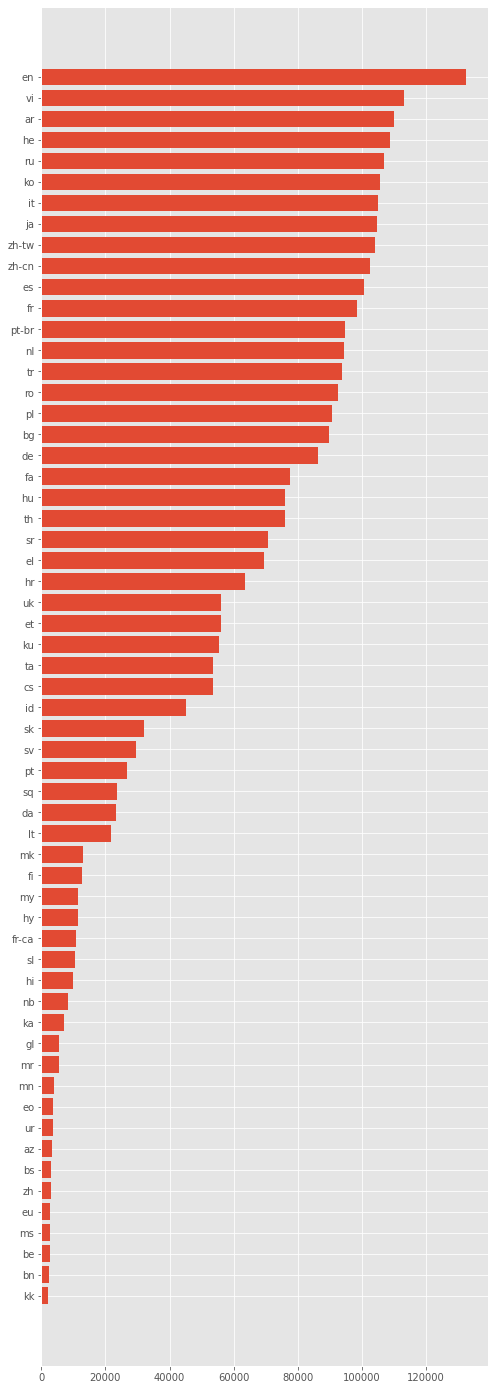

In [151]:
fig, ax = plt.subplots(figsize=(8,25))

ax.barh(lang_count['index'], lang_count['language'])
ax.invert_yaxis();

In [11]:
lang_count[lang_count['index'].apply(lambda x: x in {"en", "kk"})]

,index,language
1,en,157655
58,kk,2046


Датасет сильно не сбалансирован по классам, а требуется хорошее качество для всех языков, поэтому метрика в данном соревновании — взвешенная доля правильных ответов:

$$ 
\text{WeightedAccuracy}\left(y, \hat{y}, w\right) = \frac{\displaystyle{\sum_{i=1}^{n}} w_i \cdot \left(y_i == \hat{y}_i\right)}{\displaystyle\sum_{i=1}^{n} w_i } 
$$

Веса выбирались обратно пропорционально количеству примеров соответствующего языка:
$$
w\left(\text{"en"}\right) \sim \frac{1}{157655}
$$
$$ \dots $$
$$
w\left(\text{"kk"}\right) \sim \frac{1}{2046}
$$

Поэтому для валидации можно использовать [sklearn.metrics.balanced_accuracy_score](https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score)

# Model

In [378]:
x = train_df.values[:,  0]
label_encoder = LabelEncoder().fit(train_df.values[:, 1])
y = label_encoder.transform(train_df.values[:, 1])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)

In [379]:
pipe = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('model', SGDClassifier(random_state=SEED, loss='log'))
])

In [380]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('model', SGDClassifier(loss='log', random_state=42))])

In [381]:
predictions = pipe.predict(x_train)

In [382]:
balanced_accuracy_score(y_train, predictions)

0.47664473647590955

In [383]:
test_predictions = pipe.predict(x_test)

In [384]:
balanced_accuracy_score(y_test, test_predictions)

0.4811393731530276

# Submit

In [ ]:
submit_predictions = pipe.predict(test_df.sentence.values)

In [ ]:
test_df['language'] = label_encoder.classes_[submit_predictions]

test_df.head()

In [ ]:
(
    test_df[['index',  'language']]
    .to_csv(f'{DATA_PATH}/sample_submission.csv', index=False)
)

In [ ]:
!head $DATA_PATH/sample_submission.csv

# Homework

### Часть 1. (4 балла)
- исследовать данные
    - почистить обучающую выборку
        - есть ли ошибки в разметке?
    - посмотреть, какие символы / токены встречаются во всех языках
    - выделить коллокации для известных вам языков (хотя бы русский и английский)
- попробовать добавить в модель признаки на основе word2vec или topic modeling
- построить confusion_matrix и посмотреть, какие языки путает модель
- вывести top_k токенов с максимальной важностью для каждого класса
 
### Часть 2. (3 баллов)
- выбить хороший score на private leaderboard'е